In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth 
from sklearn import metrics

%matplotlib inline

def visualize_cluster(cluster, X):
    step_size = 0.01
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1] .min() - 1.0, X[:, 1].max() + 1.0
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, step_size), np.arange(min_y, max_y, step_size))
    output = cluster.predict(np.c_[x_vals.ravel(),y_vals.ravel()])
    output = output.reshape(x_vals.shape)
    plt.figure()
    plt.clf()
    plt.imshow(output, interpolation='nearest',
        extent=(x_vals.min(), x_vals.max(),
        y_vals.min(), y_vals.max()),
        cmap=plt.cm.Paired,
        aspect='auto',
        origin=' lower')
    plt.scatter(X[:,0], Х[:,1], marker='o', facecolors='none', edgecolors='black', s=80)
    cluster_centers = cluster.cluster_centers_
    plt.scatter(cluster_centers[:,0], cluster_centers[:,1],
        marker='o', s=210, linewidths=4, color='red',
        zorder=12, facecolors='black')
    plt.title('Clusters')
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [14]:
X = np.loadtxt('data/clast.txt', delimiter=',')
silhouette_optimaze = True

In [15]:
#K-means
num_clusters = 5
if silhouette_optimaze:
    best_score = -1
    values = np.arange(2,10)
    for num in values:
        cluster = KMeans(init='k-means++', n_clusters=num, n_init=10)
        cluster.fit(X)
        score = metrics.silhouette_score(X, cluster.labels_, metric='euclidean', sample_size=len(X))
        print(score)
        if score > best_score:
            best_score = score
            num_clusters = num
cluster = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

0.491218521457
0.49290567446
0.513926944058
0.59065198379
0.527698028848
0.478311136944
0.414166726087
0.428470491919


In [128]:
#MeanShift (сдвиг среднего)
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))
cluster = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)

In [16]:
cluster.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

NameError: name 'Х' is not defined

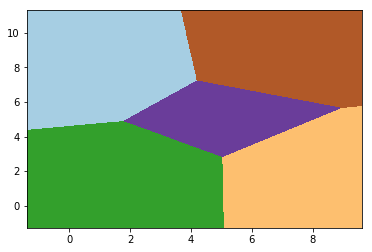

In [17]:
visualize_cluster(cluster, X)